# Linear SVM Classfication

## Soft-Margin Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=(iris.target==2) # iris virginica

svm_clf=make_pipeline(
    StandardScaler(),
    LinearSVC(C=1,dual=True,random_state=42)
)
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [4]:
X_new=[[5.2,1.4],[5.5,1.6]]
svm_clf.predict(X_new)

array([False,  True])

In [5]:
svm_clf.decision_function(X_new)

array([-0.27206678,  0.43690964])

# Non-Linear SVM Classification

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

poly_svc_clf=make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10,dual=True,max_iter=10000,random_state=42)
)
poly_svc_clf.fit(X,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

## Polynomial Kernel

In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf=make_pipeline(
    StandardScaler(),
    SVC(kernel="poly",degree=3,coef0=1,C=5)
)
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

## Similarity Features

## Gaussian RBF Kernel

In [12]:
rbf_kernel_svm_clf=make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf",gamma=5,C=0.001)
)
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

# SVM Regression

In [14]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X=2*np.random.rand(50,1)
y=4 + 3*X[:,0]+np.random.randn(50)

svm_reg=make_pipeline(StandardScaler(),
                     LinearSVR(epsilon=0.5,dual=True,random_state=42))
svm_reg.fit(X,y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

In [15]:
from sklearn.svm import SVR

np.random.seed(42)
X=2*np.random.rand(50,1)-1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg=make_pipeline(StandardScaler(),
                          SVR(kernel="poly",degree=2,epsilon=0.1,C=0.01))
svm_poly_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

# Linear SVM classifier implementation using Batch Gradient Descent

In [62]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [53]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self,C=1,eta0=1,eta_d=10000,n_epochs=1000,random_state=None):
        self.C=C
        self.eta0=eta0
        self.eta_d=eta_d
        self.n_epochs=n_epochs
        self.random_state=random_state

    def eta(self,epoch):
        return self.eta0/(epoch+self.eta_d)

    def fit(self,X,y):
        # Random seed setting
        if self.random_state:
            np.random.seed(self.random_state)
        w=np.random.randn(X.shape[1],1)  # weights of model(randomly sets during starting)
        b=0     # zero during starting

        t=np.array(y,dtype=np.float64).reshape(-1,1)*2-1

        X_t=X*t
        self.Js=[]  #Made to store loss

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx=(X_t.dot(w)+t*b<1).ravel() # ravel()->column-shaped array into a flat 1D array

            X_t_sv=X_t[support_vectors_idx]
            t_sv=t[support_vectors_idx]

            J=1/2 * (w*w).sum() + self.C *((1-X_t_sv.dot(w)).sum()-b*t_sv.sum())
            self.Js.append(J)

            w_gradient_vector=w-self.C*X_t_sv.sum(axis=0).reshape(-1,1)
            b_derivative= -self.C*t_sv.sum()

            w= w - self.eta(epoch)*w_gradient_vector
            b= b - self.eta(epoch)*b_derivative

        self.intercept_=np.array([b])
        self.coef_=np.array([w])
        support_vectors_idx=(X_t.dot(w)+t*b<1).ravel()
        self.support_vectors_=X[support_vectors_idx]
        return self

    def decision_function(self,X):
        return X.dot(self.coef_[0])+self.intercept_[0]

    def predict(self,X):
        return self.decision_function(X)>=0
 


          # why [0]->
        
           w = np.array([[0.5], [1.2]])
           print(w.shape)  # (2, 1)

           coef = np.array([w])
           print(coef.shape)     # (1, 2, 1)
           print(coef[0].shape)  # (2, 1)

In [64]:
C=2
svm_clf= MyLinearSVC(C=C,eta0=10,eta_d=1000,n_epochs=60000,random_state=2)
svm_clf.fit(X,y)

MyLinearSVC(C=2, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)

In [70]:
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ True],
       [False]])

In [72]:
print(svm_clf.intercept_,svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [88]:
svm_clf2=SVC(kernel="linear",C=C)
svm_clf2.fit(X,y)
(svm_clf2.intercept_,svm_clf2.coef_)


(array([-15.51721253]), array([[2.27128546, 2.71287145]]))

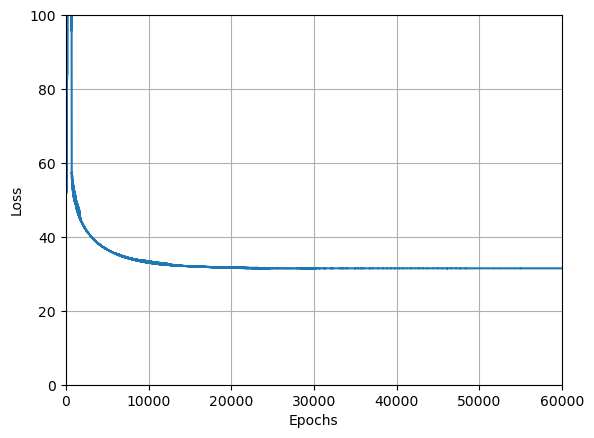

In [104]:
plt.plot(range(svm_clf.n_epochs),svm_clf.Js)
plt.axis([0,svm_clf.n_epochs,0,100])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Exercise

## 09.


*Exercise: Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.*

In [133]:
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=iris.target

setosa_or_versicolor=(y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]


In [139]:
from sklearn.linear_model import SGDClassifier
C=5
alpha=0.05

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

lin_clf=LinearSVC(loss="hinge",dual=True,C=C,random_state=42)
lin_clf.fit(X_scaled,y)

LinearSVC(C=5, dual=True, loss='hinge', random_state=42)

In [141]:
svc_clf=SVC(kernel="linear",C=C)
svc_clf.fit(X_scaled,y)

SVC(C=5, kernel='linear')

In [143]:
sgd_clf=SGDClassifier(alpha=alpha,random_state=42)
sgd_clf.fit(X_scaled,y)

SGDClassifier(alpha=0.05, random_state=42)

# 10.

*Exercise: Train an SVM classifier on the Wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?*

In [152]:
from sklearn.datasets import load_wine

wine=load_wine(as_frame=True)


In [160]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [212]:
wine.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [168]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [216]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [218]:
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [174]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [176]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=42)


In [182]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [184]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 2 to 102
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: float64

In [188]:
lin_clf=make_pipeline(StandardScaler(),
                     LinearSVC(dual=True,random_state=42))

In [190]:
lin_clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [202]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_clf,X_train,y_train).mean()

0.9774928774928775

In [204]:
svm_clf=make_pipeline(StandardScaler(),
                     SVC(random_state=42))

In [226]:
svm_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [222]:
cross_val_score(svm_clf,X_train,y_train).mean()

0.9698005698005698

In [232]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform,uniform

param_distrib={
    "svc__gamma":loguniform(0.001,0.1),
    "svc__C":uniform(1,10)
}
rnd_search_cv=RandomizedSearchCV(svm_clf,param_distrib,n_iter=100,cv=5,random_state=42)
rnd_search_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=42))]),
                   n_iter=100,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x31ddc1190>,
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30aa0f350>},
                   random_state=42)

In [240]:
rnd_search_cv.best_score_

0.9925925925925926

In [242]:
rnd_search_cv.best_params_

{'svc__C': 9.925589984899778, 'svc__gamma': 0.011986281799901188}

In [244]:
rnd_search_cv.score(X_test,y_test)

0.9777777777777777

# 11.

*Exercise: Train and fine-tune an SVM regressor on the California housing dataset.*

In [262]:
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing(as_frame=True)

print(housing.target)
housing.data.head()

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [264]:
X_train,X_test,y_train,y_test=train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [268]:
lin_svr=make_pipeline(StandardScaler(),
                     LinearSVR(dual=True,max_iter=5000,random_state=42))
lin_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=5000, random_state=42))])

In [272]:
from sklearn.metrics import root_mean_squared_error

y_pred=lin_svr.predict(X_train)
rmse=root_mean_squared_error(y_train,y_pred)
rmse

0.9795654478293887

In [288]:
svm_reg=make_pipeline(StandardScaler(),SVR())

param_distrib={
    "svr__gamma":loguniform(0.001,0.1),
    "svr__C":uniform(1,10)
}
rnd_search_cv=RandomizedSearchCV(svm_reg,param_distrib,n_iter=100,cv=3,random_state=42)
rnd_search_cv.fit(X_train[:2000],y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x320b17bf0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x320b16840>},
                   random_state=42)

In [290]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [292]:
-cross_val_score(rnd_search_cv.best_estimator_,X_train,y_train,scoring="neg_root_mean_squared_error")

array([0.58834569, 0.57468253, 0.58085159, 0.57109635, 0.5985279 ])

In [296]:
y_pred=rnd_search_cv.best_estimator_.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
rmse

0.5854802170664883